# Analysis of results taken from the experimental framework


Analysis needs to answer three specific questions that standard ML metrics don't cover:

- Reliability: Can the model write valid code? (Syntax).

- Accuracy: Does the code actually catch the rule violations? (Logic).

- Stability: Does it solve the problem the same way every time? (Determinism).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load Data
df = pd.read_csv("Master_Results.csv")




load the "Tidy Data" (Long Format) and create a "Wide Format" version for run-level statistics.

In [ ]:
# 1. Create a "Run-Level" Aggregate
# We want one row per Run ID to check overall Syntax/Stability
run_stats = df.groupby("Run ID").agg({
    "SHACL Valid Syntax": "first",     # Did the code compile?
    "SHACL Graph Hash": "first",       # What logic structure was used?
    "Execution Time": "max",           # How long did it take?
                                        # % of scenarios passed (Accuracy) : TODO
    "SHACL Error Type": "first"
}).reset_index()

display(run_stats)

# 2. Filter for only Valid Runs for Logic Analysis
valid_runs_df = df[df["SHACL Valid Syntax"] == True]
print(f"Total Runs: {len(run_stats)}")
print(f"Valid Syntax Runs: {len(run_stats[run_stats['SHACL Valid Syntax'] == True])}")

,Run ID,SHACL Valid Syntax,SHACL Graph Hash,Execution Time,SHACL Error Type
0,1,True,8643d08f8d9a5c5fd886a25d4682154a,118,VALID
1,2,True,84aa6e5b732a5a53af5ee4382e75032f,115,VALID


Total Runs: 2
Valid Syntax Runs: 2


The "Pipeline Health" Metrics (Syntax & Errors)

C:\Users\Nicklamda\AppData\Local\Temp\ipykernel_21420\1347709469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")


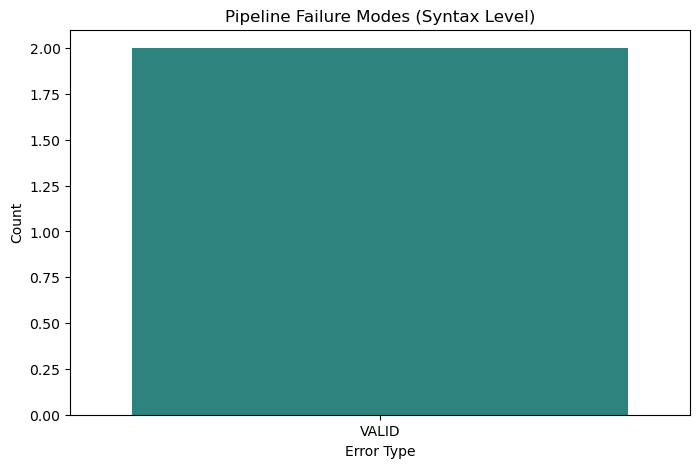

In [8]:
# Count Error Types
error_counts = run_stats["SHACL Error Type"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")
plt.title("Pipeline Failure Modes (Syntax Level)")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

The "Functional Correctness" (F1 Score / Accuracy)

In [9]:
# Group by Scenario ID and calculate the mean of 'Match' (True=1, False=0)
scenario_performance = valid_runs_df.groupby("Scenario ID")["Match"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=scenario_performance.values, y=scenario_performance.index, palette="RdYlGn")
plt.axvline(x=0.9, color='r', linestyle='--', label='90% Reliability Threshold')
plt.title("Functional Accuracy per Scenario (Valid Runs Only)")
plt.xlabel("Success Rate (0.0 - 1.0)")
plt.legend()
plt.show()

KeyError: 'Column not found: Match'

The "Stability" Analysis (The Hash)

Unique Logic Structures Generated: 2
Most Common Structure Frequency: 1


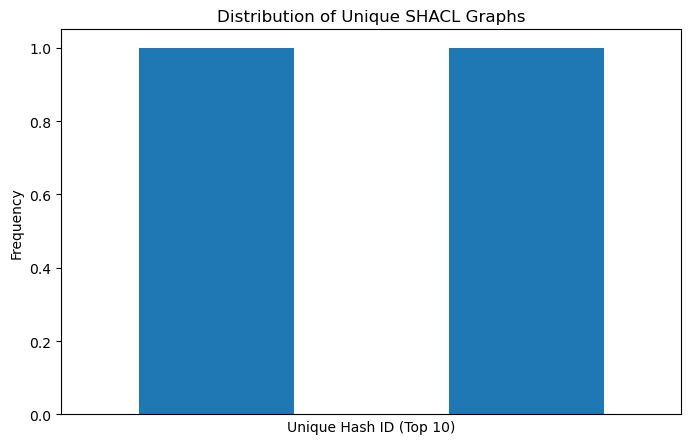

In [10]:
# Count frequency of each unique graph structure
hash_counts = run_stats[run_stats["SHACL Valid Syntax"] == True]["SHACL Graph Hash"].value_counts()

print(f"Unique Logic Structures Generated: {len(hash_counts)}")
print("Most Common Structure Frequency:", hash_counts.iloc[0])

# Visualizing the distribution
plt.figure(figsize=(8, 5))
hash_counts.head(10).plot(kind='bar')
plt.title("Distribution of Unique SHACL Graphs")
plt.xlabel("Unique Hash ID (Top 10)")
plt.ylabel("Frequency")
plt.xticks([]) # Hide ugly hash strings
plt.show()